# Machine Learning Challenge I

## 1. Importación de librerías

In [1]:
# Importo librerías de manejo general
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Importo módulos para procesamiento de datos
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Importo modelos de Clasificación
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Importo métricas de evaluación y herramientas de selección de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## 2. Importar los datos

In [2]:
# Importo datos con un dataframe de pandas
df = pd.read_csv("Train_p1.csv")
df_2 = pd.read_csv("Train_p2.csv")
# Appendeo los dos files
df = df.append(df_2)
# Cambio el tipo de datos de Amount para que sea float
df['Amount']=df['Amount'].astype(float)
# Examino el dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256326 entries, 0 to 126326
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Time            256326 non-null  float64
 1   V1              256326 non-null  float64
 2   V2              256326 non-null  float64
 3   V3              256326 non-null  float64
 4   V4              256326 non-null  float64
 5   V5              256326 non-null  float64
 6   V6              256326 non-null  float64
 7   V7              256326 non-null  float64
 8   V8              256326 non-null  float64
 9   V9              256326 non-null  float64
 10  V10             256326 non-null  float64
 11  V11             256326 non-null  float64
 12  V12             256326 non-null  float64
 13  V13             256326 non-null  float64
 14  V14             256326 non-null  float64
 15  V15             256326 non-null  float64
 16  V16             256326 non-null  float64
 17  V17       

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Card_Limit,Card_Franchise,Status,Class
0,109530.0,1.641504,-0.118108,0.193331,3.544888,0.601648,2.965813,-1.257025,0.866142,1.035425,...,-1.091525,-0.737340,-0.127210,0.030250,-0.040807,54.33,13495,Master,approved,0
1,53102.0,1.331932,-0.579479,0.927182,-0.551507,-1.473758,-1.026256,-0.764831,-0.189192,-0.665700,...,0.765715,0.422733,-0.129021,0.027417,0.030145,29.00,5224,AMEX,approved,0
2,140517.0,1.973157,-0.944394,0.124453,-0.092508,-1.751058,-1.212101,-0.851435,-0.177842,-0.037161,...,0.886448,-0.879357,0.213429,-0.014208,-0.021918,47.00,8814,VISA,rejected,0
3,79305.0,-1.435908,1.524430,1.129484,1.118073,0.823542,0.385199,0.745317,0.685064,-1.904515,...,-0.329870,0.537772,-0.000692,-0.241396,-0.067335,16.48,4493,VISA,rejected,0
4,32491.0,1.191111,0.253410,0.396854,0.727996,-0.421515,-0.810615,-0.044980,-0.035763,0.140102,...,0.335860,0.070278,0.106967,-0.011778,0.028680,0.99,15681,Master,approved,0


## 3. Análisis Exploratorio

In [41]:
# Resumen estadístico del dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Card_Limit,Class
count,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,...,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000
mean,94802.094009,0.000534,0.001652,0.000495,0.000817,-0.000014,0.000251,-0.000600,-0.000454,0.000476,...,-0.000401,-0.000224,0.000383,-0.000698,0.000342,-0.000126,-0.000381,88.077874,10265.061266,0.001728
std,47482.789613,1.954440,1.645344,1.514818,1.415525,1.379010,1.332339,1.239475,1.199836,1.099124,...,0.726421,0.624855,0.605410,0.521757,0.482516,0.404940,0.328364,249.519831,5628.091310,0.041537
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,500.000000,0.000000
25%,54141.250000,-0.920803,-0.598655,-0.889745,-0.847813,-0.691673,-0.768846,-0.554232,-0.208713,-0.642961,...,-0.542743,-0.161692,-0.354272,-0.317604,-0.326866,-0.070934,-0.052970,5.550000,5393.000000,0.000000
50%,84711.000000,0.018303,0.066399,0.179703,-0.020248,-0.054580,-0.274421,0.040103,0.022115,-0.051257,...,0.006119,-0.010893,0.041451,0.016559,-0.052272,0.001300,0.011222,22.000000,10261.000000,0.000000
75%,139304.000000,1.315349,0.804679,1.028073,0.744292,0.612640,0.398602,0.570272,0.327517,0.597535,...,0.527867,0.147475,0.439918,0.350422,0.241376,0.091012,0.078239,77.010000,15151.000000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,19999.000000,1.000000


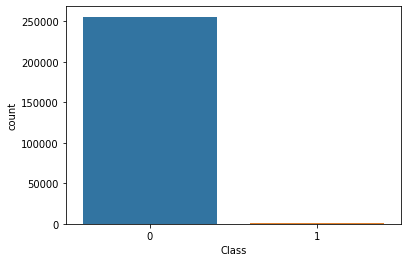

Possitive class:  0.0017282679088348432


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Card_Limit
Class,,,,,,,,,,,,,,,,,,,,,
0,47478.741625,1.924535,1.629430,1.456232,1.398541,1.355109,1.329865,1.177984,1.164276,1.089531,...,0.718830,0.724162,0.621608,0.605545,0.521128,0.482517,0.400988,0.327831,249.494712,5628.024714
1,47663.742917,6.842315,4.351505,7.184510,2.915280,5.407598,1.893429,7.350460,7.062366,2.529194,...,4.064153,1.557613,1.652789,0.511977,0.806800,0.479400,1.406650,0.551480,262.159676,5672.782576


In [38]:
# Countplot para entender la distribución de clases
sns.countplot(x="Class",data=df)
plt.show()

# Cálculo de la presencia de la clase positiva
print('Possitive class: ',np.sum(df.loc[df['Class'] == 1]['Class'])/len(df))

# Calculo las métricas estadísticas por clase para determinar diferencias clave
df.groupby('Class').mean()
df.groupby('Class').std()

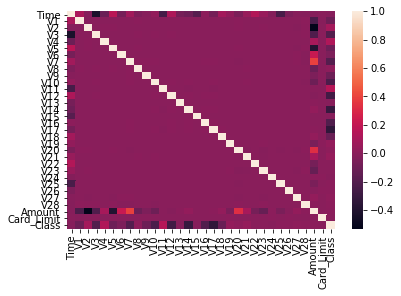

In [24]:
# Calculo la matriz de correlación entre las variables y la ploteo en un heatmap
corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## 4. Preprocesamiento de datos

In [3]:
# Separo el dataframe entre el label y los features
X, y = df.iloc[:,:-1], df.iloc[:,-1]
# Aplico OneHotEncoder en las features categóricas (Card Franchise y Status) y normalizo en las features que se encuentran en una escala muy diferente (Time, Amount, Card_Limit)
transformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['Card_Franchise','Status']),('normalizer',MinMaxScaler(),['Time','Amount','Card_Limit'])], remainder='passthrough')
X_transformed = np.array(transformer.fit_transform(X))
columns = ['encoder__x0_Master', 'encoder__x0_VISA', 'encoder__x1_rejected', 'Time', 'Amount', 'Card_Limit', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [4]:
# Separo train y test
seed = 1234
X_train, X_test, y_train, y_test= train_test_split(X_transformed, y, test_size=0.2, random_state=seed)

## 5. Estimación de modelos y optimización de hiperparámetros

In [7]:
# Veo la performance de diferentes modelos de clasificación con hiperparámetros básicos. Guardo la performance de Cross Validation y del test set en listas

models = [LogisticRegression(solver='liblinear'),
          DecisionTreeClassifier(max_depth=6, random_state=seed),
          RandomForestClassifier(n_estimators=25,random_state=seed),
          AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, random_state=seed), n_estimators=25, random_state=seed),
          GradientBoostingClassifier(max_depth=6,n_estimators=25,random_state=seed)]
cv_results = []
test_results = []
for model in models:
    cv_scores = cross_val_score(model,X_train,y_train,cv=5,scoring='f1_macro')
    print(cv_scores)
    print("Average 5-Fold F1 Score: {}".format(np.mean(cv_scores)))
    cv_results.append(np.mean(cv_scores))
    mod = model.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    f1 = f1_score(y_test,y_pred)
    test_results.append(f1)
    print("Test F1 Score: {}".format(f1))

[0.90142217 0.82177751 0.88507497 0.87581074 0.87282051]
Average 5-Fold F1 Score: 0.8713811790860626
[0.92264823 0.87015667 0.92129424 0.91467438 0.90129499]
Average 5-Fold F1 Score: 0.9060137017881855
[0.93189621 0.87998825 0.94606837 0.93170828 0.93371362]
Average 5-Fold F1 Score: 0.9246749476342015
[0.93189621 0.87481686 0.93740232 0.93065933 0.93693324]
Average 5-Fold F1 Score: 0.9223415916244052
[0.89688786 0.84938777 0.8849275  0.89021555 0.84586069]
Average 5-Fold F1 Score: 0.873455874680165


In [11]:
# Optimizo los hiperparámetros de los mejores dos modelos de la exploración inicial

# Optimizacion de un Decision Tree

dt_param_grid = {
    'min_samples_split': range(100,500,100),
    'max_depth': range(2,15),
    'random_state': [seed]
}
dt = DecisionTreeClassifier()
gridsearch_dt_f1 = GridSearchCV(param_grid=dt_param_grid,estimator=dt,scoring='f1',cv=5,verbose=1)
gridsearch_dt_f1.fit(X_train,y_train)
print("Best parameters found: ", gridsearch_dt_f1.best_params_)
print("Best F1 found: ", gridsearch_dt_f1.best_score_)
y_pred = gridsearch_dt_f1.predict(X_test)
f1 = f1_score(y_test,y_pred)
print("F1 on test set: ", f1)

cv_results.append(gridsearch_dt_f1.best_score_)
test_results.append(f1)
models.append(gridsearch_dt_f1.best_estimator_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed: 32.5min finished


Best parameters found:  {'max_depth': 4, 'min_samples_split': 100, 'random_state': 1234}
Best F1 found:  0.780557548661337
F1 on test set:  0.7745664739884394


In [12]:
# Optimizacion de un Random Forest

rf_param_grid = {
    'min_samples_split': range(100,500,100),
    'n_estimators': range(10,50,5),
    'max_depth': range(2,15),
    'random_state': [seed]
}
rf = RandomForestClassifier()
randomized_rf_f1 = RandomizedSearchCV(param_distributions=rf_param_grid,estimator=rf,scoring='f1',n_iter=25,cv=5,verbose=1)
randomized_rf_f1.fit(X_train,y_train)
print("Best parameters found: ", randomized_rf_f1.best_params_)
print("Best F1 found: ", randomized_rf_f1.best_score_)
y_pred = randomized_rf_f1.predict(X_test)
f1 = f1_score(y_test,y_pred)
print("F1 on test set: ", f1)

cv_results.append(randomized_rf_f1.best_score_)
test_results.append(f1)
models.append(randomized_rf_f1.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 39.4min finished


Best parameters found:  {'random_state': 1234, 'n_estimators': 40, 'min_samples_split': 100, 'max_depth': 12}
Best F1 found:  0.8042050690550415
F1 on test set:  0.7730061349693252


In [10]:
# Pruebo con XGBoost y optimizo sus hiperparámetros en una primer instancia usando Random Search

gbm_param_grid = {
    'num_boost_round': [50],
    'early_stopping_rounds': [10],
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': range(10,50,5),
    'max_depth': range(2,15),
    'random_state': [seed]
}
gbm = xgb.XGBClassifier(objective='binary:logistic')
randomized_gbm_f1 = RandomizedSearchCV(param_distributions=gbm_param_grid,estimator=gbm,scoring='f1',n_iter=25,cv=5,verbose=1)
randomized_gbm_f1.fit(X_train,y_train)
print("Best parameters found: ", randomized_gbm_f1.best_params_)
print("Best F1 found: ", randomized_gbm_f1.best_score_)

cv_results.append(randomized_gbm_f1.best_score_)
y_pred = randomized_gbm_f1.predict(X_test)
f1 = f1_score(y_test,y_pred)
test_results.append(f1)
models.append(randomized_gbm_f1.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[02:45:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:45:20] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:45:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:45:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[02:50:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:51:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:51:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[02:57:05] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:57:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:57:34] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[03:02:15] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:02:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:02:42] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[03:08:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:08:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:09:01] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[03:15:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:16:14] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:16:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 33.7min finished


[03:18:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters found:  {'random_state': 1234, 'num_boost_round': 50, 'n_estimators': 45, 'max_depth': 10, 'early_stopping_rounds': 10, 'colsample_bytree': 0.7}
Best F1 found:  0.8665372054594895


In [13]:
# Optimizo hiperparámetros con Grid Search en el ámbito cercano de hipérparámetros del mejor modelo de XGBoost

gbm_param_grid_2 = {
    'num_boost_round': [50],
    'early_stopping_rounds': [10],
    'colsample_bytree': [0.7],
    'n_estimators': range(40,50),
    'max_depth': range(8,12),
    'random_state': [seed]
}
gbm = xgb.XGBClassifier(objective='binary:logistic')
gridsearch_gbm_f1 = GridSearchCV(param_grid=gbm_param_grid_2,estimator=gbm,scoring='f1',cv=5,verbose=1)
gridsearch_gbm_f1.fit(X_train,y_train)
print("Best parameters found: ", gridsearch_gbm_f1.best_params_)
print("Best F1 found: ", gridsearch_gbm_f1.best_score_)

cv_results.append(gridsearch_gbm_f1.best_score_)
y_pred = gridsearch_gbm_f1.predict(X_test)
f1 = f1_score(y_test,y_pred)
test_results.append(f1)
models.append(gridsearch_gbm_f1.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[04:32:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:32:57] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:33:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[04:43:03] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:43:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:44:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[04:54:36] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:55:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:55:40] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[05:05:38] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:06:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:06:38] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[05:17:24] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:17:57] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[05:28:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:29:24] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:29:53] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[05:40:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:41:15] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:41:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[05:52:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:53:02] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:53:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:04:22] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:04:55] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:05:27] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 100.7min finished


[06:13:11] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters found:  {'colsample_bytree': 0.7, 'early_stopping_rounds': 10, 'max_depth': 8, 'n_estimators': 48, 'num_boost_round': 50, 'random_state': 1234}
Best F1 found:  0.8684796477673487


In [14]:
# Grid search en el ámbito cercano de parámetros del mejor modelo

# Create the parameter grid: gbm_param_grid 
gbm_param_grid_3 = {
    'num_boost_round': [50],
    'early_stopping_rounds': [10],
    'colsample_bytree': [0.7],
    'n_estimators': range(40,50),
    'max_depth': range(2,8),
    'random_state': [seed]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBClassifier(objective='binary:logistic')

# Perform random search: grid_mse
gridsearch_gbm2_f1 = GridSearchCV(param_grid=gbm_param_grid_3,estimator=gbm,scoring='f1',cv=5,verbose=1)

# Fit randomized_mse to the data
gridsearch_gbm2_f1.fit(X_train,y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", gridsearch_gbm2_f1.best_params_)
print("Best F1 found: ", gridsearch_gbm2_f1.best_score_)

cv_results.append(gridsearch_gbm2_f1.best_score_)
y_pred = gridsearch_gbm2_f1.predict(X_test)
f1 = f1_score(y_test,y_pred)
test_results.append(f1)
models.append(gridsearch_gbm2_f1.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[06:13:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[06:14:01] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:14:11] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:14:21] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:17:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:17:59] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:18:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:21:59] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:22:10] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:22:22] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:27:07] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:27:21] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:27:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:32:54] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:39:24] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:39:42] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:40:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:46:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:47:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:47:21] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[06:54:33] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:54:55] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:55:16] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[07:03:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:03:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:04:04] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[07:12:26] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:12:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:13:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[07:21:57] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:22:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:22:49] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[07:32:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:32:35] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:33:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[07:42:18] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:42:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:43:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 99.5min finished


[07:53:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters found:  {'colsample_bytree': 0.7, 'early_stopping_rounds': 10, 'max_depth': 6, 'n_estimators': 40, 'num_boost_round': 50, 'random_state': 1234}
Best F1 found:  0.8656660606455407


In [15]:
# Revisión de los resultados obtenidos hasta el momento
print(models)
print(cv_results)
print(test_results)

[0.8713811790860626, 0.9060137017881855, 0.9246749476342015, 0.9223415916244052, 0.873455874680165, 0.8665372054594895, 0.780557548661337, 0.8042050690550415, 0.8684796477673487, 0.8656660606455407]
[0.7051282051282052, 0.8414634146341463, 0.8170731707317073, 0.8227848101265823, 0.7701149425287356, 0.8554216867469879, 0.7745664739884394, 0.7730061349693252, 0.8606060606060606, 0.8554216867469879]


In [82]:
# Pruebo hacer un Voting Classifier utilizando los 3 mejores modelos (contemplando F1 en test y en Cross Validation)
# Utilizo 5 diferentes splits entre train y test para estar seguro de cuál es el modelo consistentemente más performante

seeds = [1234,2567,8743,7352,5271]
f1_scores = []
for s in seeds:
    X_tr, X_te, y_tr, y_te= train_test_split(X_transformed, y, test_size=0.2, random_state=s)
    classifiers = [('Random Forest', RandomForestClassifier(n_estimators=25,random_state=seed)), 
                ('XGBoost 1', xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.7, early_stopping_rounds=10, max_depth=8, n_estimators=48, num_boost_round=50, random_state=seed)),
              ('XGBoost 2', xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.7, early_stopping_rounds=10, max_depth=6, n_estimators=40, num_boost_round=50, random_state=seed))]
    
    scores = []
    # Itero sobre los clasificadores definidos
    for clf_name, clf in classifiers:    
        clf.fit(X_tr, y_tr)    
        y_pred = clf.predict(X_te)
        f1_model = f1_score(y_te,y_pred) 
        print('{:s} : {:.3f}'.format(clf_name, f1_model))
        scores.append(f1_model)

    vc = VotingClassifier(estimators=classifiers)     
    vc.fit(X_tr,y_tr)   
    y_pred = vc.predict(X_te)
    f1 = f1_score(y_te,y_pred)
    print('Voting Classifier: {:.3f}'.format(f1))
    scores.append(f1)
    f1_scores.append(scores)

f1_df=pd.DataFrame(f1_scores,columns=['Random Forest','XGBoost 1','XGBoost 2','Voting'])

Random Forest : 0.817
[15:50:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost 1 : 0.861
[15:51:36] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost 2 : 0.855
[15:52:57] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language binding

In [83]:
# Analizo los resultados del Clasificador por Votación y sus componentes en los 5 diferentes sets de test
f1_df.describe()

,Random Forest,XGBoost 1,XGBoost 2,Voting
count,5.000000,5.000000,5.000000,5.000000
mean,0.847531,0.855762,0.851202,0.853870
std,0.023017,0.022633,0.018041,0.023450
min,0.817073,0.835443,0.831169,0.831169
25%,0.840764,0.843750,0.843750,0.843750
50%,0.846154,0.846154,0.846154,0.846154
75%,0.852713,0.860606,0.855422,0.855422
max,0.880952,0.892857,0.879518,0.892857


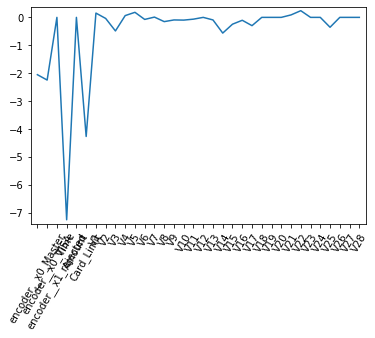

                 feature  lasso_coef
0     encoder__x0_Master   -2.055330
1       encoder__x0_VISA   -2.247736
2   encoder__x1_rejected    0.000000
3                   Time   -7.258183
4                 Amount    0.000000
5             Card_Limit   -4.270896
6                     V1    0.153785
7                     V2   -0.038421
8                     V3   -0.486766
9                     V4    0.063678
10                    V5    0.181094
11                    V6   -0.073654
12                    V7    0.009961
13                    V8   -0.152490
14                    V9   -0.092133
15                   V10   -0.097978
16                   V11   -0.063839
17                   V12    0.000000
18                   V13   -0.092148
19                   V14   -0.563240
20                   V15   -0.244566
21                   V16   -0.104017
22                   V17   -0.297026
23                   V18    0.000000
24                   V19    0.000000
25                   V20    0.000000
2

In [7]:
# Busco los features más importantes con una clasificación LASSO

lasso = LogisticRegression(fit_intercept=False,penalty='l1', solver='liblinear', C=0.01)
lasso.fit(X_transformed,y)
lasso_coef = lasso.coef_[0]

# Ploteo los coeficientes
plt.plot(range(len(columns)), lasso_coef)
plt.xticks(range(len(columns)), columns, rotation=60)
plt.margins(0.02)
plt.show()

# Creo un dataframe con los coeficientes

reg_coef = pd.DataFrame({'feature':columns,'lasso_coef':lasso_coef})

print(reg_coef)

In [21]:
# Evalúo el mejor modelo obtenido con un subsample de features definido por el modelo LASSO

indexes = reg_coef['feature'][(reg_coef['lasso_coef']>0)|(reg_coef['lasso_coef']<0)].index
X_transformed_sub = X_transformed[:,indexes]
X_train_sub, X_test_sub, y_train_sub, y_test_sub= train_test_split(X_transformed_sub, y, test_size=0.2, random_state=seed)
xgb_final_sub = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.7, early_stopping_rounds=10, max_depth=8, n_estimators=48, num_boost_round=50, random_state=seed)
xgb_final_sub.fit(X_train_sub, y_train_sub)    
y_pred_sub = xgb_final_sub.predict(X_test_sub)
f1_sub = f1_score(y_test_sub,y_pred_sub)
print('Subsampled XGBoost: {:.3f}'.format(f1_sub))

[00:35:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Subsampled XGBoost: 0.854


In [23]:
# Analizo cual es el punto óptimo de corte del horizonte de decisión del clasificador

xgb_final = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.7, early_stopping_rounds=10, max_depth=8, n_estimators=48, num_boost_round=50, random_state=seed)

xgb_final.fit(X_train, y_train)    

y_pred_prob = xgb_final.predict_proba(X_test)

for boundary in np.arange(0,1,0.1):
    y_pred_p = np.where(y_pred_prob[:,1] > boundary, 1, 0)
    f1 = f1_score(np.array(y_test),y_pred_p)
    print('Decision boundary =',boundary,': {:.3f}'.format(f1))
    

[00:39:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Decision boundary = 0.0 : 0.003
Decision boundary = 0.1 : 0.837
Decision boundary = 0.2 : 0.840
Decision boundary = 0.30000000000000004 : 0.850
Decision boundary = 0.4 : 0.850
Decision boundary = 0.5 : 0.861
Decision boundary = 0.6000000000000001 : 0.866
Decision boundary = 0.7000000000000001 : 0.866
Decision boundary = 0.8 : 0.859
Decision boundary = 0.9 : 0.848


El mejor modelo obtenido, y el elegido para testear es un XGBoost con los siguientes hiperparámetros (objective='binary:logistic', colsample_bytree=0.7, early_stopping_rounds=10, max_depth=8, n_estimators=48, num_boost_round=50), y contemplando un horizonte de decisión de 0.6 en vez de 0.5 (default)

## 6. Testeo final del modelo

In [18]:
#seed_test= 1111

final_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.7, early_stopping_rounds=10, max_depth=8, n_estimators=48, num_boost_round=50)
final_model.fit(X_transformed, y)    

[20:30:28] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=10, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=48, n_jobs=0, num_boost_round=50,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [19]:
import pickle
filename = 'finalized_model_v2.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [28]:
xgb_final = pickle.load(open(filename, 'rb'))
df_test = pd.read_csv("Test.csv")
df_test['Amount']=df_test['Amount'].astype(float)
X_t, y_t = df_test.iloc[:,:-1], df_test.iloc[:,-1]
transformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['Card_Franchise','Status']),('normalizer',MinMaxScaler(),['Time','Amount','Card_Limit'])], remainder='passthrough')
X_t_transformed = np.array(transformer.fit_transform(X_t))
y_pred_prob_test = xgb_final.predict_proba(X_t_transformed)
y_pred_test = np.where(y_pred_prob_test[:,1] > 0.7, 1, 0)
f1_test = f1_score(y_t,y_pred_test)

print('Test F1 Score : {:.3f}'.format(f1_test))

Test F1 Score : 0.831


In [16]:
print(X_t_transformed[:,-1])
print(y_t)

[-0.04080747  0.03014547 -0.02191828 ...  0.11087029 -0.24168697
  0.01212233]
0         0
1         0
2         0
3         0
4         0
         ..
126322    0
126323    0
126324    0
126325    0
126326    0
Name: Class, Length: 256326, dtype: int64
